In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


In [3]:
train = pd.read_csv('blog.csv')

In [4]:
df = train.copy()

In [5]:
df.head()

,id,title,text
0,212,News,Ukrainian President Volodymyr Zelensky (left) ...
1,211,News,The Grilled Sirloin steak served with french f...
2,210,News,Moses Wetang'ula (left) and Musalia Mudavadi w...
3,209,News,Not every Valentine’s Day gesture or gift will...
4,208,News,Former Kiambu governor Ferdinand Waititu.\n\n\...


In [6]:
# remove special characters
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

C:\Users\MURIMI\AppData\Local\Temp/ipykernel_6336/4149783970.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")


In [7]:
df.head()

,id,title,text
0,212,News,Ukrainian President Volodymyr Zelensky left ...
1,211,News,The Grilled Sirloin steak served with french f...
2,210,News,Moses Wetang ula left and Musalia Mudavadi w...
3,209,News,Not every Valentine s Day gesture or gift will...
4,208,News,Former Kiambu governor Ferdinand Waititu By...


In [8]:
# remove words with less than 3 chracters long
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [9]:
df.drop(['id'], axis=1)

,title,text
0,News,Ukrainian President Volodymyr Zelensky left ta...
1,News,Grilled Sirloin steak served with french fries...
2,News,Moses Wetang left Musalia Mudavadi required br...
3,News,every Valentine gesture gift will work every w...
4,News,Former Kiambu governor Ferdinand Waititu Josep...
...,...,...
206,Agriculture,editors will review what submitted determine w...
207,Agriculture,African swine fever normally affects domestic ...
208,Agriculture,editors will review what submitted determine w...
209,Agriculture,murram road leads Seeds Gold team acre farm Ki...


In [12]:
df.replace(to_replace=r'^News', value=0, regex=True,inplace=True)

In [13]:
df.replace(to_replace=r'^Agriculture', value=1, regex=True, inplace=True)

In [15]:
df.tail()

,id,title,text
206,6,1,editors will review what submitted determine w...
207,5,1,African swine fever normally affects domestic ...
208,4,1,editors will review what submitted determine w...
209,3,1,murram road leads Seeds Gold team acre farm Ki...
210,1,1,high nitrogen content fresh chicken manure mea...


In [16]:
tokenized_blog = df['text'].apply(lambda x: x.split())

In [17]:
tokenized_blog.head()

0    [Ukrainian, President, Volodymyr, Zelensky, le...
1    [Grilled, Sirloin, steak, served, with, french...
2    [Moses, Wetang, left, Musalia, Mudavadi, requi...
3    [every, Valentine, gesture, gift, will, work, ...
4    [Former, Kiambu, governor, Ferdinand, Waititu,...
Name: text, dtype: object

In [18]:
from nltk import PorterStemmer

In [19]:
ps = PorterStemmer()
tokenized_blog = tokenized_blog.apply(lambda x: [ps.stem(i) for i in x])

In [20]:
tokenized_blog.head()

0    [ukrainian, presid, volodymyr, zelenski, left,...
1    [grill, sirloin, steak, serv, with, french, fr...
2    [mose, wetang, left, musalia, mudavadi, requir...
3    [everi, valentin, gestur, gift, will, work, ev...
4    [former, kiambu, governor, ferdinand, waititu,...
Name: text, dtype: object

In [21]:
for i in range(len(tokenized_blog)):
    tokenized_blog[i] = ' '.join(tokenized_blog[i])

df['text'] = tokenized_blog

In [22]:
df.head()

,id,title,text
0,212,0,ukrainian presid volodymyr zelenski left talk ...
1,211,0,grill sirloin steak serv with french fri garde...
2,210,0,mose wetang left musalia mudavadi requir bring...
3,209,0,everi valentin gestur gift will work everi wom...
4,208,0,former kiambu governor ferdinand waititu josep...


In [23]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [24]:
all_news = ' '.join(text for text in df['text'][df['title']==0])

In [25]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_news)

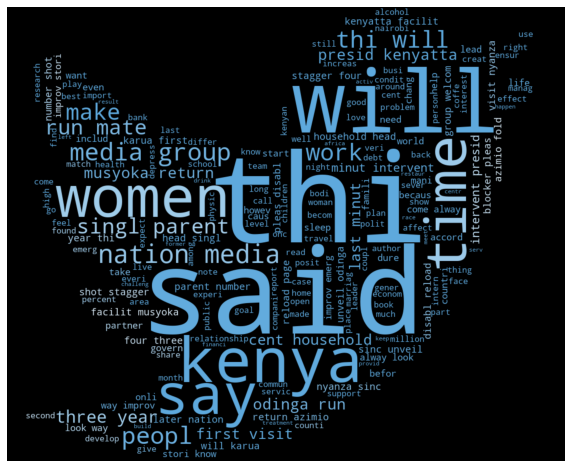

In [26]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [27]:
all_agric = ' '.join(text for text in df['text'][df['title']==1])

In [28]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_agric)

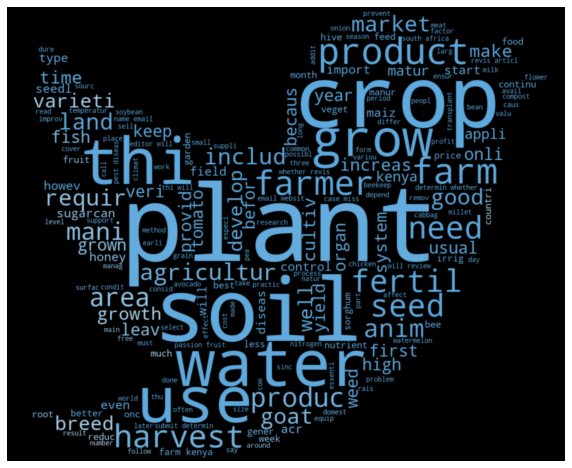

In [29]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [34]:
df

,id,title,text
0,212,0,ukrainian presid volodymyr zelenski left talk ...
1,211,0,grill sirloin steak serv with french fri garde...
2,210,0,mose wetang left musalia mudavadi requir bring...
3,209,0,everi valentin gestur gift will work everi wom...
4,208,0,former kiambu governor ferdinand waititu josep...
...,...,...,...
206,6,1,editor will review what submit determin whethe...
207,5,1,african swine fever normal affect domest popul...
208,4,1,editor will review what submit determin whethe...
209,3,1,murram road lead seed gold team acr farm kimum...


In [35]:
df = df.drop('id', axis=1)

In [36]:
df

,title,text
0,0,ukrainian presid volodymyr zelenski left talk ...
1,0,grill sirloin steak serv with french fri garde...
2,0,mose wetang left musalia mudavadi requir bring...
3,0,everi valentin gestur gift will work everi wom...
4,0,former kiambu governor ferdinand waititu josep...
...,...,...
206,1,editor will review what submit determin whethe...
207,1,african swine fever normal affect domest popul...
208,1,editor will review what submit determin whethe...
209,1,murram road lead seed gold team acr farm kimum...


In [37]:
from sklearn.utils import shuffle

In [38]:
df = shuffle(df)

In [39]:
df

,title,text
34,0,cover page richard kioko kiundi memoir through...
120,1,tambien dispon espa egal dispon fran govern ha...
95,0,more more avoid doctor wors go deni mutua stud...
199,1,farm veget farm fruit farm livestock farm vide...
4,0,former kiambu governor ferdinand waititu josep...
...,...,...
111,1,editor will review what submit determin whethe...
121,1,tambien dispon espa egal dispon fran will glob...
86,0,sumptuou meat platter char choma restaur momba...
56,0,famili bank offici dure open branch isiolo ken...


In [40]:
df = df.sample(frac=1).reset_index(drop=True)

In [48]:
df

,title,text
0,1,farm veget farm fruit farm livestock farm vide...
1,1,victor mwamuy azolla farm kilifi counti joseph...
2,0,merci gakii muiruri head investor relat kenya ...
3,0,have lost subscrib first time more than decad ...
4,1,farm veget farm fruit farm livestock farm vide...
...,...,...
206,1,infospac ultim inform space thi profit carrot ...
207,0,american tech giant appl record fastest growth...
208,0,safaricom been alloc prime internet spectrum f...
209,0,ukrainian presid volodymyr zelenski left talk ...


In [49]:
df.to_csv('clean.csv')